# Iris eye Recognition

## Firstly, we will import all required libraries

In [16]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

## Localization


### Gaussian and Bilateral Filter are mostly used for enhancing image for iris detection

### 1) Gaussian

Firstly, we will use Gaussian Blur to smooth out the image and remove high-frequency noise that might interfere with Hough Circle Detection

In [17]:

def localization_Gauss(image):
    try:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_blurred = cv2.GaussianBlur(gray, (5, 5), 2)
        circles = cv2.HoughCircles(
            gray_blurred,
            cv2.HOUGH_GRADIENT,
            dp=1,
            minDist=30,
            param1=60,
            param2=30,
            minRadius=40,
            maxRadius=100
        )
        if circles is not None:
            circles = np.uint16(np.around(circles))
            x = circles[0][0][0]
            y = circles[0][0][1]
            r = circles[0][0][2]
            zoom_out_factor = 1
            crop_size = int(r * zoom_out_factor * 2)
            x1, y1 = max(x - crop_size, 0), max(y - crop_size, 0)
            x2, y2 = min(x + crop_size, image.shape[1]), min(y + crop_size, image.shape[0])

            cropped_image = image[y1:y2, x1:x2]
            resized_image = cv2.resize(cropped_image, (224, 224))
            return resized_image
        else:
            #print("No circles detected.")
            return None
    except Exception as e:
        #print(e)
        a=0 
    


For the multiple processing at a time, I will use a loop function to looping through all 10000 images in the datasets

In [18]:
def iterate_dataset_localization(dataset_path):
    num_of_pics = 0
    num_of_err = 0
    error_ids=[]
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(".jpg"):  # Adjust for your image format
                num_of_pics+=1
                try:
                    image_path = os.path.join(root, file)
                    id_number = os.path.basename(root)  # Extract the ID number from the folder name
                    image = cv2.imread(image_path)
                    resized_image=localization_Gauss(image)
                # Process the image and ID number as needed
                    #print(f"Processing image: {image_path}, ID: {id_number}")
                # Extract ID and filename
                    id_dir, filename = os.path.split(image_path)
                    id_number = os.path.basename(id_dir)

                # Create the output directory if it doesn't exist
                    output_dir = os.path.join("processed_image", id_number)
                    os.makedirs(output_dir, exist_ok=True)

                # Construct the output filename
                    output_filename = os.path.join(output_dir, filename)
                    cv2.imwrite(output_filename, resized_image)
                except Exception as e:
                    #print(f"Error processing image: {image_path}, ID: {id_number}, Error: {e}")
                    num_of_err+=1
                    error_ids.append(image_path)
    print("Error files: ")
    for i in range(0,5):
        print(error_ids[i])
    print("Number of images: "+str(num_of_pics))
    print("Number of errors: "+str(num_of_err))
dataset_path = "dataset"
iterate_dataset_localization(dataset_path)

C:\Users\Kim Duy Minh\AppData\Local\Temp\ipykernel_36028\1526325327.py:22: RuntimeWarning: overflow encountered in scalar subtract
  x1, y1 = max(x - crop_size, 0), max(y - crop_size, 0)


Error files: 
dataset\019\S6019S07.jpg
dataset\021\S6021S03.jpg
dataset\021\S6021S05.jpg
dataset\021\S6021S08.jpg
dataset\021\S6021S09.jpg
Number of images: 10000
Number of errors: 452


Let's have a look at those error images.

Image 1 shape: (480, 640, 3), Channels: 3
Image 2 shape: (480, 640, 3), Channels: 3
Image 3 shape: (480, 640, 3), Channels: 3
Image 4 shape: (480, 640, 3), Channels: 3
Image 5 shape: (480, 640, 3), Channels: 3


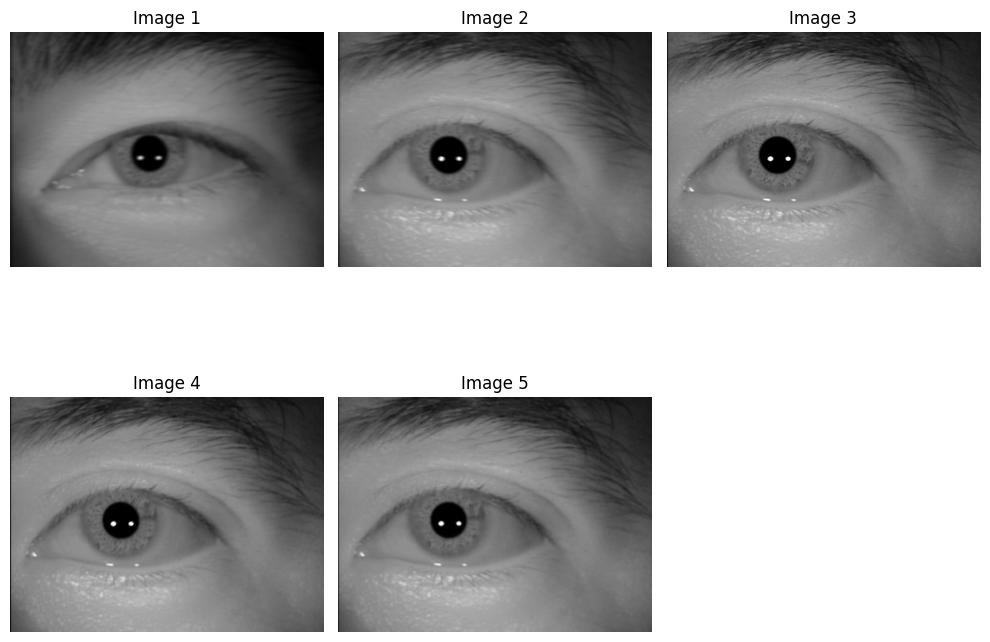

In [23]:
import cv2
import matplotlib.pyplot as plt

# List of image paths
image_paths = [
    r'dataset\019\S6019S07.jpg',
    r'dataset\021\S6021S03.jpg',
    r'dataset\021\S6021S05.jpg',
    r'dataset\021\S6021S08.jpg',
    r'dataset\021\S6021S09.jpg'
]

# Create a figure to display multiple images
plt.figure(figsize=(10, 8))

# Loop through each image path and display the image
for i, image_path in enumerate(image_paths, 1):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    
    # Check if image is loaded correctly
    if image is None:
        print(f"Failed to load image at: {image_path}")
        continue

    # Debugging: Check the color channels and image shape
    print(f"Image {i} shape: {image.shape}, Channels: {image.shape[2]}")  # Should be 3 for color images

    # Convert from BGR (OpenCV default) to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Add the image to the subplot
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, i-th image
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide the axes
    plt.title(f"Image {i}")

# Display the images
plt.tight_layout()
plt.show()
